# MOHMMAD  AVESH HUSAIN

# Task- Prediction using unsupervised ML

# Aim- From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn import metrics

In [2]:
data = pd.read_csv('Iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# removing id column which is of no use
data.drop('Id',inplace=True,axis=1)

In [5]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.shape

(150, 5)

In [7]:
#checking for missing values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
#no need of scaling each feature has same scale
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Now we have to find the optimal number of clusters

In [9]:
# We will use Elbow method for that

In [10]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [11]:
# preparing the data
x = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
x.shape

(150, 4)

In [12]:
# creating a list to hold wss(within cluster sum of value)
wcss = []

In [13]:
# checkin for k values in range 1,11
for cluster in range(1,11):
    kmean = KMeans(n_clusters=cluster,random_state=24)
    kmean.fit(x)
    
    inertia = kmean.inertia_
    wcss.append(inertia)
    

In [14]:
wcss

[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.317873214285726,
 46.55057267267267,
 38.94595367106238,
 34.26949838969403,
 30.27495426400225,
 27.992635739389623,
 26.35468119393507]

Text(0, 0.5, 'WCSS Values')

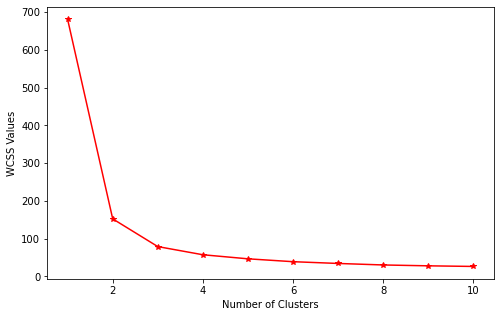

In [15]:
#Drawing the elbow curve
plt.figure(figsize=(8,5))
plt.plot(np.arange(1,11),wcss,'r*-')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS Values')

# we can see that at 3 the cluster are becoming saturated(WCSS does'nt decrease significantly)
# optimal number of cluster are 3

In [16]:
# fitting kmeans with n_clusters = 3
kmeans= KMeans(n_clusters=3,random_state=24)

y_predict =kmeans.fit_predict(x)


In [17]:
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [18]:
# checking centroids
centers = kmeans.cluster_centers_
centers



array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

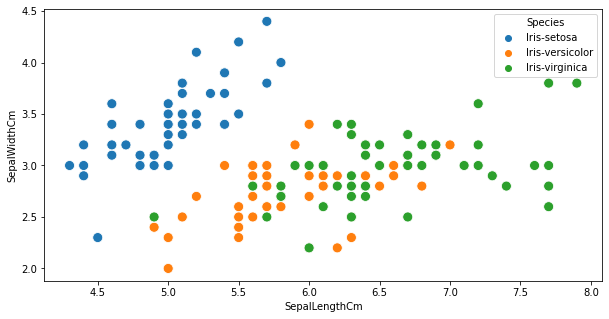

In [19]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=data['SepalLengthCm'],y=data['SepalWidthCm'], hue=data['Species'],s=100)

<AxesSubplot:>

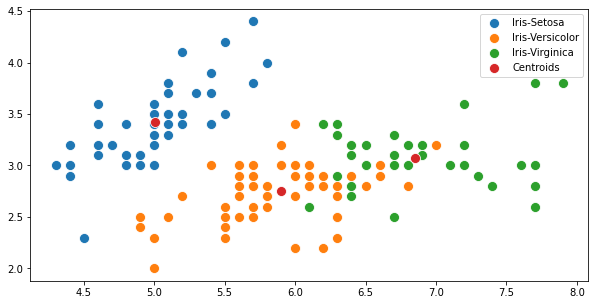

In [20]:
#visualising clusters on sepallength nd sepal width
plt.figure(figsize=(10,5))
sns.scatterplot(x=x[y_predict==1,0],y=x[y_predict==1,1],label='Iris-Setosa',s=100)
sns.scatterplot(x=x[y_predict==0,0],y=x[y_predict==0,1],label='Iris-Versicolor',s=100)
sns.scatterplot(x=x[y_predict==2,0],y=x[y_predict==2,1],label='Iris-Virginica',s=100)

#Plotting centroid of clusters
sns.scatterplot(x=centers[:,0],y=centers[:,1],label='Centroids',s=100)

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

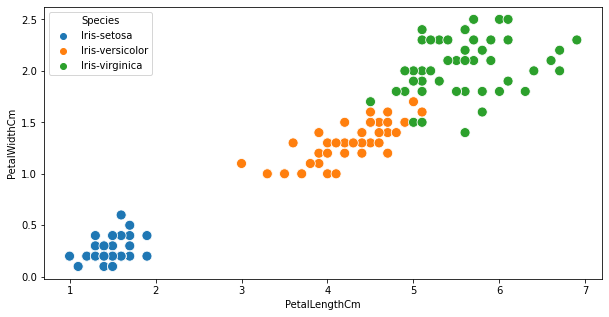

In [21]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=data['PetalLengthCm'],y=data['PetalWidthCm'], hue=data['Species'],s=100)

<AxesSubplot:>

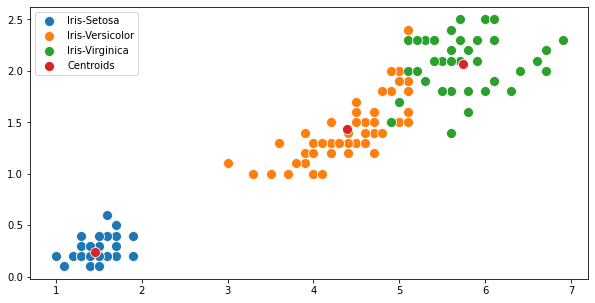

In [22]:
#visualising clusters on petallength nd petal width
plt.figure(figsize=(10,5))
sns.scatterplot(x=x[y_predict==1,2],y=x[y_predict==1,3],label='Iris-Setosa',s=100)
sns.scatterplot(x=x[y_predict==0,2],y=x[y_predict==0,3],label='Iris-Versicolor',s=100)
sns.scatterplot(x=x[y_predict==2,2],y=x[y_predict==2,3],label='Iris-Virginica',s=100)

#Plotting centroid of clusters
sns.scatterplot(x=centers[:,2],y=centers[:,3],label='Centroids',s=100)

# Thank you

## validation

In [23]:
def mapping(x):
    dict = {'Iris-setosa':1, 'Iris-versicolor':0, 'Iris-virginica':2}
    if x in dict.keys():
        return dict[x]
encod_truevalue = data['Species'].apply(mapping)  

In [24]:
metrics.accuracy_score(encod_truevalue,y_predict)

0.8933333333333333

<AxesSubplot:title={'center':'Predicted'}>

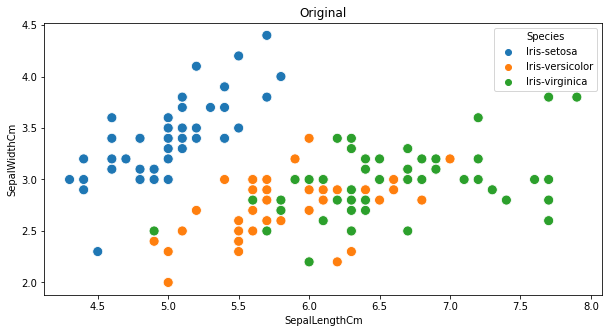

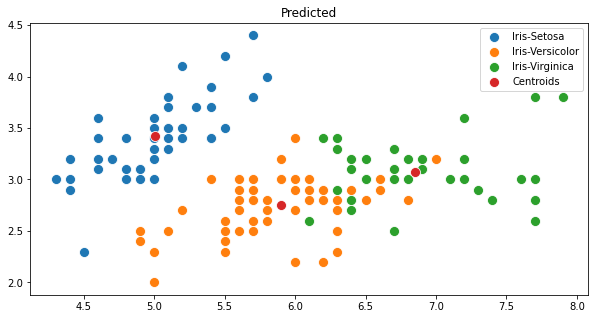

In [25]:
plt.figure(figsize=(10,5))
plt.title('Original')
sns.scatterplot(x=data['SepalLengthCm'],y=data['SepalWidthCm'], hue=data['Species'],s=100)



#visualising clusters on sepallength nd sepal width

plt.figure(figsize=(10,5))
sns.scatterplot(x=x[y_predict==1,0],y=x[y_predict==1,1],label='Iris-Setosa',s=100)
sns.scatterplot(x=x[y_predict==0,0],y=x[y_predict==0,1],label='Iris-Versicolor',s=100)
sns.scatterplot(x=x[y_predict==2,0],y=x[y_predict==2,1],label='Iris-Virginica',s=100)
plt.title('Predicted')
#Plotting centroid of clusters
sns.scatterplot(x=centers[:,0],y=centers[:,1],label='Centroids',s=100)

<AxesSubplot:title={'center':'Predicted'}>

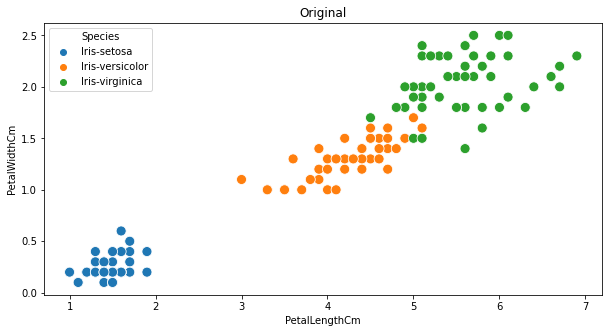

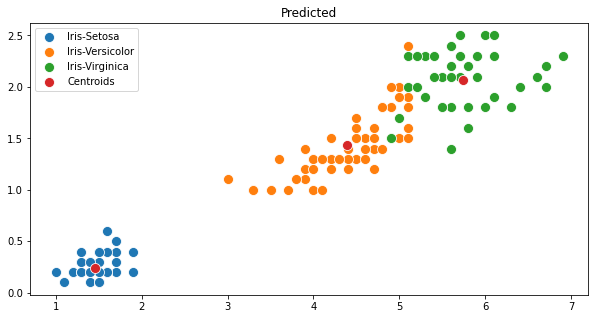

In [26]:
plt.figure(figsize=(10,5))
plt.title('Original')
sns.scatterplot(x=data['PetalLengthCm'],y=data['PetalWidthCm'], hue=data['Species'],s=100)



#visualising clusters on sepallength nd sepal width

plt.figure(figsize=(10,5))
sns.scatterplot(x=x[y_predict==1,2],y=x[y_predict==1,3],label='Iris-Setosa',s=100)
sns.scatterplot(x=x[y_predict==0,2],y=x[y_predict==0,3],label='Iris-Versicolor',s=100)
sns.scatterplot(x=x[y_predict==2,2],y=x[y_predict==2,3],label='Iris-Virginica',s=100)
plt.title('Predicted')
#Plotting centroid of clusters
sns.scatterplot(x=centers[:,2],y=centers[:,3],label='Centroids',s=100)